<a href="https://colab.research.google.com/github/AdaobiNwafor/DataScience-Projects/blob/main/Predicting_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [ ]:
records = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = pd.DataFrame(records)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df[['ejection_fraction', 'time', 'serum_sodium']].describe()

,ejection_fraction,time,serum_sodium
count,299.000000,299.000000,299.000000
mean,38.083612,130.260870,136.625418
std,11.834841,77.614208,4.412477
min,14.000000,4.000000,113.000000
25%,30.000000,73.000000,134.000000
50%,38.000000,115.000000,137.000000
75%,45.000000,203.000000,140.000000
max,80.000000,285.000000,148.000000


### Feature selection

In [ ]:
plt.rcParams['figure.figsize']=10,8
sns.set_style("darkgrid")

In [ ]:
x = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

Importing Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier().fit(x,y)
feature_importance = model.feature_importances_

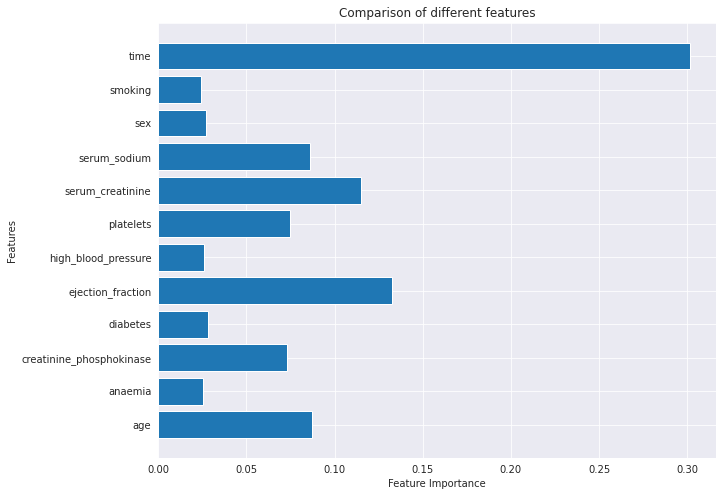

In [ ]:
plt.barh(x.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Comparison of different features')
plt.show()

## Alternatively

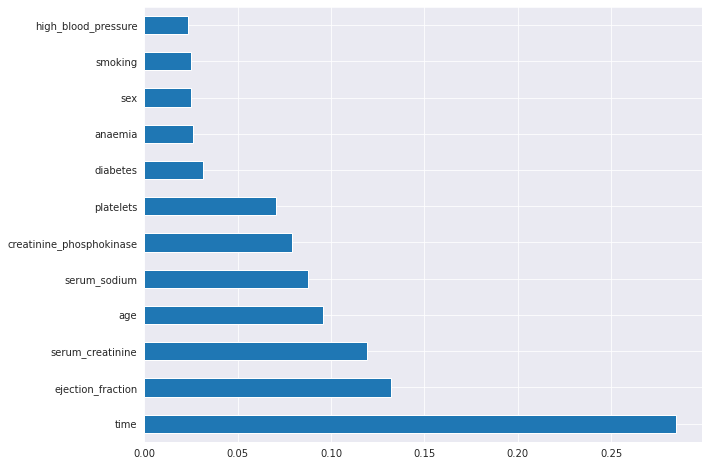

In [ ]:
model = ExtraTreesClassifier().fit(x,y)
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
feature_importance.nlargest(12).plot(kind='barh')
plt.show()

### Selecting the top 3 features

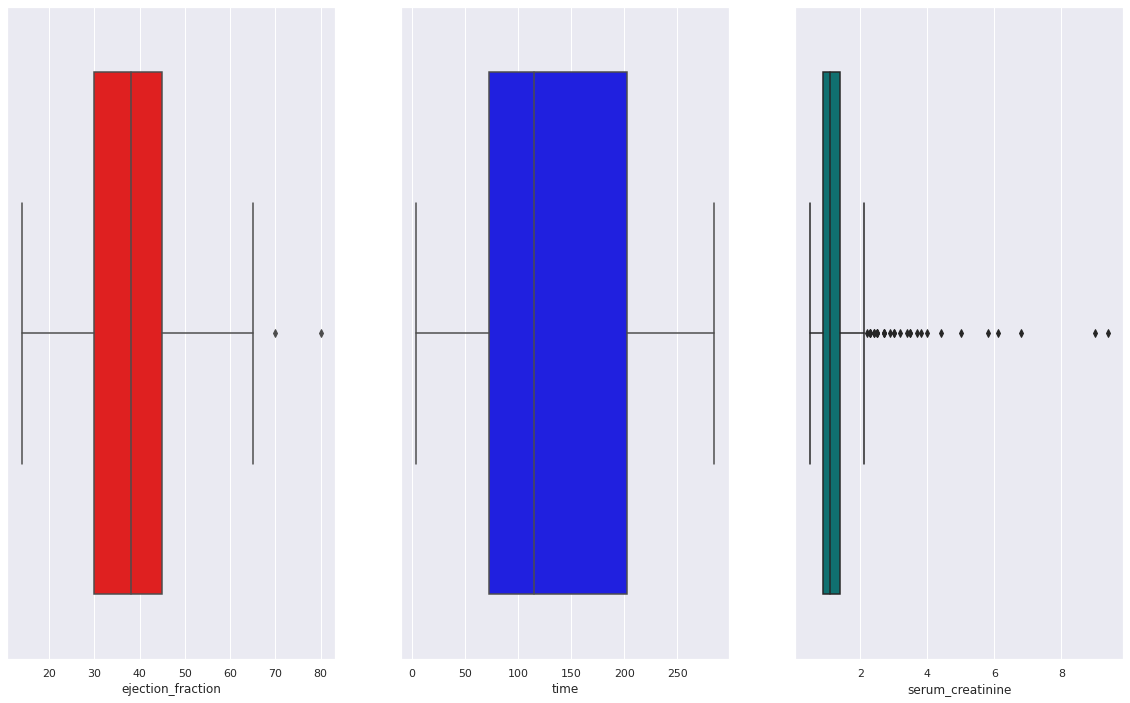

In [ ]:
sns.set()
fig, axes = plt.subplots(1, 3, figsize=(20,12))

sns.boxplot(ax=axes[0], x=df.ejection_fraction, color='red')
sns.boxplot(ax=axes[1], x=df.time, color='blue')
sns.boxplot(ax=axes[2], x=df.serum_creatinine, color='teal')

# fig = plt.gcf()
# fig.set_size_inches(14,10)
plt.show()


## It is definitely more ideal to show these boxplots separately, but the method for making multiple plots within the same figure stands

### Removing outliers

In [ ]:
df['serum_creatinine'].describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

In [ ]:
df = df[df['ejection_fraction']<70]

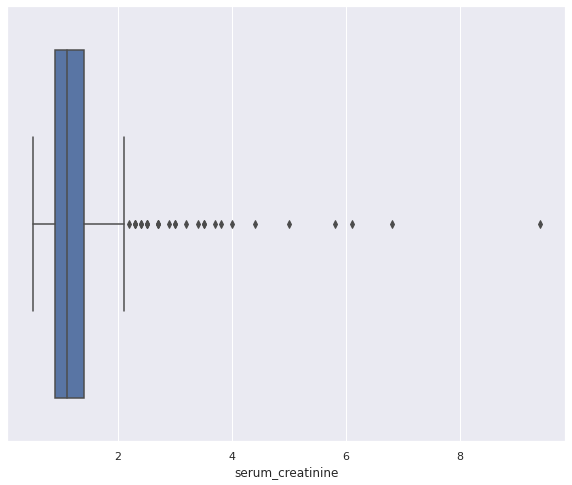

In [ ]:
sns.boxplot(x=df['serum_creatinine'])

In [ ]:
df['age'].describe()

count    297.000000
mean      60.910215
std       11.892512
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

# Using plotly go

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['age'],
    xbins = dict(
        start=40,
        end=95,
        size=2
    ),
    marker_color='red',
    opacity=1
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

## categorise the graph by death events

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=df.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

## Death event distribution

In [ ]:
fig = px.pie(df, names='DEATH_EVENT', title='Distribution of death event in patients', width=400, height=400)
fig.show()

In [ ]:
corr = df.corr()
corr[abs(corr['DEATH_EVENT'])>0.1]['DEATH_EVENT']

age                  0.255490
ejection_fraction   -0.284516
serum_creatinine     0.286439
serum_sodium        -0.196280
time                -0.536734
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [ ]:
X = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y = df['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

Logistic Regression success: 88.33%


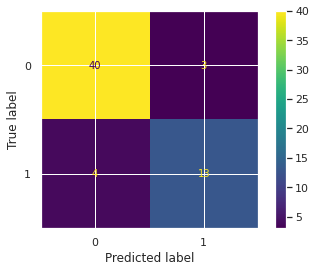

In [ ]:
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
ypred = model.predict(X_test)
ac = accuracy_score(ypred, y_test)
print(f'Logistic Regression success: {ac*100:.2f}%')
plot_confusion_matrix(model, X_test, y_test)
plt.show()

Gradient Boosting Classifier success: 91.67%


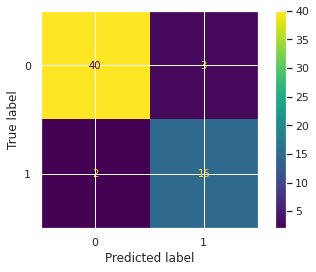

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier().fit(X_train, y_train)
ypred = gbc.predict(X_test)
ac = accuracy_score(ypred, y_test)
print(f'Gradient Boosting Classifier success: {ac*100:.2f}%')
plot_confusion_matrix(gbc, X_test, y_test)
plt.show()

Random Forest Classifier success: 91.67%


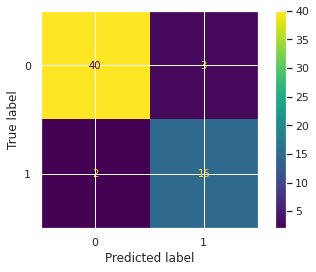

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train, y_train)
ypred = rfc.predict(X_test)
ac = accuracy_score(ypred, y_test)
print(f'Random Forest Classifier success: {ac*100:.2f}%')
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

SVM success: 91.67%


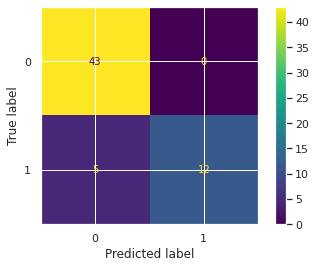

In [ ]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)
ypred = svm.predict(X_test)
ac = accuracy_score(ypred, y_test)
print(f'SVM success: {ac*100:.2f}%')
plot_confusion_matrix(svm, X_test, y_test)
plt.show()

KNN success:
[96.67, 95.0, 95.0, 93.33, 93.33]


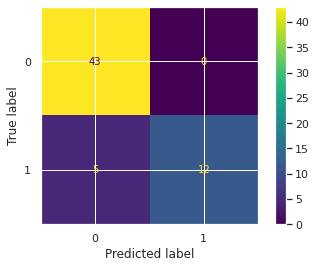

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

scorelist = []
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  ypred = knn.predict(X_test)
  ac = accuracy_score(ypred, y_test)
  scorelist.append(round(100*ac, 2))

print(f'KNN success:')
print(sorted(scorelist, reverse=True)[:5])
plot_confusion_matrix(knn, X_test, y_test)
plt.show()


Decision Tree Classifier Success:
[95.0, 95.0, 95.0, 95.0, 95.0]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.82      0.78      0.80        18

    accuracy                           0.88        60
   macro avg       0.87      0.85      0.86        60
weighted avg       0.88      0.88      0.88        60

MSE: 0.11666666666666667
RMSE: 0.3415650255319866


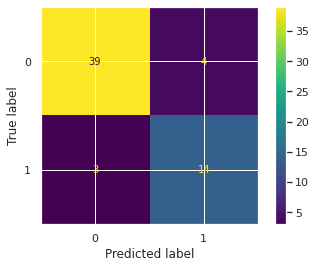

In [ ]:
from sklearn.tree import DecisionTreeClassifier

scorelist = []
for leaves in range(2,10):
  tree = DecisionTreeClassifier(max_leaf_nodes=leaves, random_state=0, criterion='entropy')
  tree.fit(X_train, y_train)
  ypred = tree.predict(X_test)
  ac = accuracy_score(ypred, y_test)
  scorelist.append(round(100*ac, 2))

print(f'Decision Tree Classifier Success:')
print(sorted(scorelist, reverse=True)[:5])
plot_confusion_matrix(tree, X_test, y_test)
print('')
print(f'Classification Report:\n')
print(classification_report(ypred, y_test))
print(f'MSE: {mean_squared_error(ypred, y_test)}')
print(f'RMSE: {np.sqrt(mean_squared_error(ypred, y_test))}')
plt.show()